### Student Information
Name:

Student ID:

GitHub ID:

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

## Content

Part 1 exercise data  with new dataset

part 2 new visualization



### Part 1 exercise data  with new dataset

In [68]:
### Begin Assignment Here


In [69]:
# 環境設定 Environment setup (Phase 1)
import pandas as pd
import numpy as np
from pathlib import Path

import nltk
nltk.download('punkt', quiet=True)

from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import matplotlib.pyplot as plt
import math

RANDOM_STATE = 42
pd.set_option('display.max_colwidth', 120)


In [70]:
# 讀取資料（相對路徑） Load dataset (relative path)
data_path = Path('newdataset') / 'Reddit-stock-sentiment.csv'
Data_path = data_path  # alias (original variable name)
df = pd.read_csv(data_path, encoding='utf-8')
df.head()


,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Btankersly66,https://apnews.com/article/trump-truth-social-djt-tesla-musk-tariffs-pause-fccfa6b06c8f1ec0cd7844641ca52669,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comments/165kllm/who_knows_more_vmar/,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', 'Marine', 'Main', 'Systems', 'Vision Marine Technologies Inc.', 'Visio...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping to call Trump quickly.,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/trump-xi-china-tariffs/index.html,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0


### Exercise 1

In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [71]:
# 練習 1：印出前三筆文字資料 Exercise 1: print first three text samples
for i in range(3):
    print(f'(for example {i+1})')
    print('label:', df.loc[i, 'label'])
    print(df.loc[i, 'text'])
    print()


(for example 1)
label: -1.0
Calls on retards

(for example 2)
label: 0.0
Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.

(for example 3)
label: 0.0
Seeing lots of red in the ticker.



### Exercise 2 


In [72]:
# 練習 2：pandas 查詢練習 Exercise 2: pandas querying practice

# 建立 Phase 1 的清理後資料表 Create a cleaned working dataframe for Phase 1
df_work = df[['datetime', 'subreddit', 'title', 'text', 'label', 'polarity', 'subjectivity']].copy()
df_work['datetime'] = pd.to_datetime(df_work['datetime'], errors='coerce')
df_work['label'] = pd.to_numeric(df_work['label'], errors='coerce')
df_work['text'] = df_work['text'].fillna('').astype(str)
df_work = df_work[df_work['text'].str.strip().ne('')].dropna(subset=['label']).reset_index(drop=True)

print('shape:', df_work.shape)
print('label distribution:')
display(df_work['label'].value_counts(dropna=False))

# 使用 iloc：依位置取值 iloc: select by position
display(df_work.iloc[:3])

# 使用 loc：用條件過濾 loc: boolean filtering
display(df_work.loc[df_work['label'] == 1.0, ['label', 'subreddit', 'text']].head(3))

# query?? SQL ?? query: SQL-like filtering
display(df_work.query('label == -1.0')[['label', 'subreddit', 'text']].head(3))

# 文字包含搜尋 string contains
display(df_work[df_work['text'].str.contains('stock', case=False, na=False)].head(3))

# 隨機抽樣 sample
display(df_work.sample(3, random_state=RANDOM_STATE))


shape: (847, 7)
label distribution:


label
 0.0    423
-1.0    315
 1.0    109
Name: count, dtype: int64

,datetime,subreddit,title,text,label,polarity,subjectivity
0,2025-04-11 17:29:56,wallstreetbets,Retardation is on the menu boys! WSB is so back,Calls on retards,-1.0,-0.900000,1.000000
1,2025-04-12 01:12:19,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,0.0,0.083333,0.177778
2,2025-04-10 15:09:41,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Seeing lots of red in the ticker.,0.0,0.000000,0.000000


,label,subreddit,text
3,1.0,stockstobuytoday,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...
8,1.0,stocks,Am I the only one seeing the cup & handle breakout here? 52 week high? Third Green Day? The pivot was on Thursday. P...
9,1.0,stockstobuytoday,HLGN is $10. Hurry and catch it now before it shoots to the moon!


,label,subreddit,text
0,-1.0,wallstreetbets,Calls on retards
4,-1.0,StockMarket,He didn’t say thank you.
6,-1.0,stocks,Trump will respond to china increasing their tariffs. Trump is looking to fire Jerome Powell. Earnings reporting is ...


,datetime,subreddit,title,text,label,polarity,subjectivity
48,2025-04-02 13:00:42,stockstobuytoday,Earnings for current week,\r\n\r\n [MarketWatch: Stock Market News - Financial News - Earmings Stonkvest (stockbuyvest.com)]() \r\n\r\n\#cata...,0.0,0.000000,0.000000
63,2025-03-01 10:00:42,stocks,Rate My Portfolio - r/Stocks Quarterly Thread March 2025,"Please use this thread to discuss your portfolio, learn of other stock tickers & portfolios like [Warren Buffet's](/...",0.0,0.176667,0.368030
72,2025-04-04 06:25:04,stockstobuytoday,Spending first $250 tmmw on stocks,"A lot of stocks are down right now, and I'm thinking of spending 250 on the below tmmw. Thoughts (some are partial c...",0.0,0.005102,0.347959


,datetime,subreddit,title,text,label,polarity,subjectivity
457,2025-04-11 15:42:58,StockMarket,Trump: We Are Doing Really Well On Our Tariff Policy.,"""We"" who?",0.0,0.0,0.00
342,2025-04-12 03:04:05,wallstreetbets,"Retail giant TARGET has now declined for 10 consecutive weeks, its longest losing streak in history",Chicken jockey,0.0,-0.6,0.95
280,2025-04-10 14:40:26,StockMarket,How do you feel about a sitting president making $415M in one day after pumping his own stock with social media and ...,Not great Bob,-1.0,0.8,0.75


### Exercise 3

In [73]:

# 目標：抓特定 subreddit 的資料，每 10 筆取 1 筆，只顯示前 5 筆
# Goal: filter one subreddit, take every 10th row, show first 5

target_subreddit = "StockMarket"  # 你也可以改成 "wallstreetbets" 等
df_sub = df_work.loc[df_work["subreddit"] == target_subreddit, ["datetime", "subreddit", "label", "text"]].reset_index(drop=True)

# every 10th record -> 0,10,20,... then head(5)
display(df_sub.iloc[::10].head(5))


,datetime,subreddit,label,text
0,2025-04-10 15:09:41,StockMarket,0.0,Seeing lots of red in the ticker.
10,2025-04-11 16:11:48,StockMarket,-1.0,Comedy gold :))
20,2025-04-11 15:15:20,StockMarket,0.0,I can’t take four years of lying. Help!
30,2025-04-11 10:04:54,StockMarket,0.0,\r\nAn evil man will burn his own nation to the ground to rule over the ashes. Sun Tzu
40,2025-04-11 14:46:24,StockMarket,-1.0,He reached this level only because of his inheritance. He consistently ruins everything he touches. The only reason ...


### EX4

In [74]:

# 目標:按列(row/record)算每筆缺值數
# Goal: count missing values per record (row) instead of per column


# 每筆缺值數 / missing count per row
missing_per_row = df_work.isna().sum(axis=1)

# 把結果加回表，方便觀察 / attach to dataframe
df_work["missing_count"] = missing_per_row

print("missing_count value counts:")
display(df_work["missing_count"].value_counts().sort_index())

# 顯示缺值最多的前 5 筆 / show top 5 rows with most missing
display(df_work.sort_values("missing_count", ascending=False).head(5)[
    ["datetime", "subreddit", "label", "missing_count", "text"]
])


missing_count value counts:


missing_count
0    847
Name: count, dtype: int64

,datetime,subreddit,label,missing_count,text
846,2025-04-12 03:09:06,wallstreetbets,0.0,0,![img](emote|t5_2th52|31224)
0,2025-04-11 17:29:56,wallstreetbets,-1.0,0,Calls on retards
1,2025-04-12 01:12:19,wallstreetbets,0.0,0,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...
2,2025-04-10 15:09:41,StockMarket,0.0,0,Seeing lots of red in the ticker.
3,2023-08-30 17:12:55,stockstobuytoday,1.0,0,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...


### 4.2 重複值處理 Dealing with Duplicate Data

In [75]:

# 目標：檢查重複列並去除（以 text 為主，避免同一篇內容重複）
# Goal: check and remove duplicates (based on text to avoid duplicated content)

print("Before:", df_work.shape)

# 1) 檢查整列重複 / check full-row duplicates
full_dup_count = df_work.duplicated().sum()
print("Full-row duplicates:", full_dup_count)

# 2) 檢查 text 重複 / check duplicates by text
text_dup_count = df_work.duplicated(subset=["text"]).sum()
print("Text duplicates:", text_dup_count)

# 3) 去除 text 重複（保留第一筆）/ drop duplicates by text (keep first)
df_work = df_work.drop_duplicates(subset=["text"], keep="first").reset_index(drop=True)

print("After:", df_work.shape)


Before: (847, 8)
Full-row duplicates: 0
Text duplicates: 23
After: (824, 8)


### 5.1

抽樣 200 筆 Sampling 200 records


In [78]:
n =200
df_sample = df_work.sample(n=n, random_state=RANDOM_STATE).reset_index(drop=True)
sample = df_work.sample(n=n, random_state=RANDOM_STATE).reset_index(drop=True)
print(df_work.shape, df_sample.shape)


(824, 8) (200, 8)



### 抽樣分佈比較subredditCompare distribution 

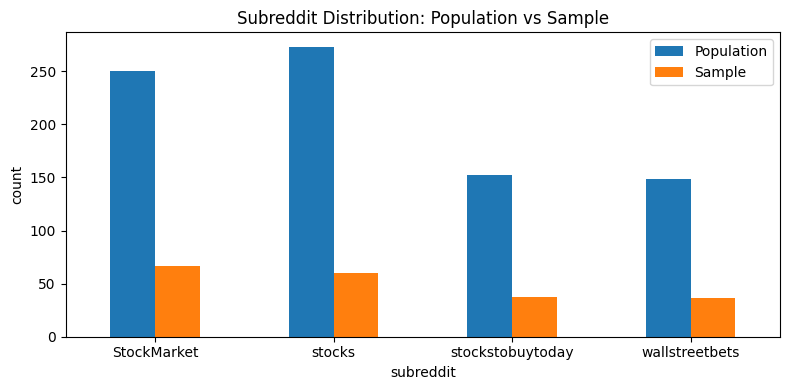

In [ ]:
import matplotlib.pyplot as plt


population_count = df_work["subreddit"].value_counts()
sample_count = df_sample["subreddit"].value_counts()

count_compare = pd.DataFrame({
    "Population": population_count,
    "Sample": sample_count
}).fillna(0)

ax = count_compare.plot(kind="bar", figsize=(8,4), rot=0)
ax.set_title("Subreddit Distribution: Population vs Sample")
ax.set_xlabel("subreddit")
ax.set_ylabel("count")
plt.tight_layout()
plt.show()

Feature Creation

In [82]:
import nltk
nltk.download("punkt", quiet=True)

# HW 5.2：建立 unigrams 欄位（對應 Master 5.2）
df_work["unigrams"] = df_work["text"].fillna("").astype(str).apply(nltk.word_tokenize)

display(df_work.loc[:3, ["text", "unigrams"]])
print(list(df_work.loc[0:0, "unigrams"]))


,text,unigrams
0,Calls on retards,"[Calls, on, retards]"
1,Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk...,"[Stunt, as, in, like, why, did, they, even, make, a, big, deal, about, starting, it, in, the, first, place, ?, No, c..."
2,Seeing lots of red in the ticker.,"[Seeing, lots, of, red, in, the, ticker, .]"
3,Vision Marine Technologies Inc. is rewriting the watercraft rulebook. Their collaboration with Shaun Torrente has ac...,"[Vision, Marine, Technologies, Inc., is, rewriting, the, watercraft, rulebook, ., Their, collaboration, with, Shaun,..."


[['Calls', 'on', 'retards']]


##　5.3 Feature subset selection

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer：學 vocabulary 並產生文件-詞矩陣
# Goal: learn vocabulary and return document-term matrix
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_work["text"].fillna("").astype(str))

print(X_counts[0])  # 第一筆文件的稀疏向量表示



  (np.int32(0), np.int32(692))	1
  (np.int32(0), np.int32(2706))	1
  (np.int32(0), np.int32(3248))	1


### EXERCISE 9

In [ ]:
#Analyze the first record with build_analyzer(
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_work["text"].fillna("").astype(str))

analyze = count_vect.build_analyzer()

first_rec = df_work.loc[0, "text"]
tokens = analyze(first_rec)
tokens

['calls', 'on', 'retards']

In [88]:
X_counts[0:5, 0:100
         ].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### Exercise 10

In [91]:
count_vect.get_feature_names_out()[0:1]

array(['00'], dtype=object)

In [ ]:

# 目標：在文件的前 20 個詞向量中，找出第 2 個非 0 的詞
# Goal: find the 2nd non-zero entry in the first 20 terms of a document vector, then map back to the word

# 先用 CountVectorizer 建立 X_counts（不要加 stop_words，盡量貼近 Master）
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(df_work["text"].fillna("").astype(str))

# 第 5 篇文件（index=4）
row5 = X_counts[4].toarray().ravel()
non0 = np.nonzero(row5)[0]

print("non-zero positions:", non0)

if len(non0) < 2:
    print("第 5 筆文件非 0 少於 2 個，無法找到第 2 個非 0。")
else:
    vocab = count_vect.get_feature_names_out()
    second_idx = non0[1]
    print("2nd non-zero position:", second_idx)
    print("word:", vocab[second_idx])
    print("words in doc5:", vocab[non0])


non-zero positions: [1169 1846 3349 3844 4333]
2nd non-zero position: 1846
word: he
words in doc5: ['didn' 'he' 'say' 'thank' 'you']


畫HEAT MAP


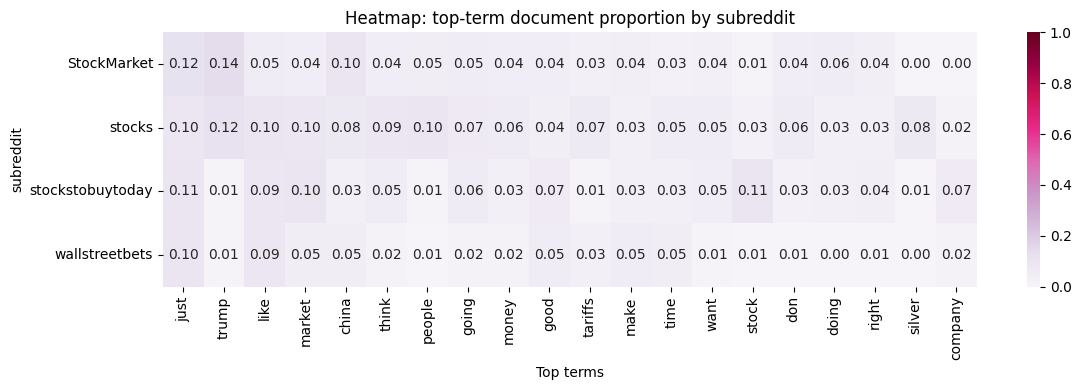

In [ ]:

import seaborn as sns


# Heatmap (HW): subreddit (Y) x top terms (X)
#X=高頻詞，Y=subreddit
#  X=top frequent terms, Y=subreddit

K = 20  # top K terms on X-axis

# 1) 建 BoW / build BoW
count_vect = CountVectorizer(stop_words="english", lowercase=True)
X_counts = count_vect.fit_transform(df_work["text"].fillna("").astype(str))
vocab = np.array(count_vect.get_feature_names_out())

# 2) 選 top K/ select top K by term frequency
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()
top_idx = np.argsort(term_frequencies)[::-1][:K]
top_terms = vocab[top_idx]

# 3) 對每個 subreddit 算「包含該詞的文件比例」/ per-subreddit document proportion
subreddits = sorted(df_work["subreddit"].dropna().unique().tolist())
plot_z = []

for sub in subreddits:
    mask = (df_work["subreddit"] == sub).to_numpy()
    X_sub = X_counts[mask][:, top_idx]           # docs_in_sub x K
    prop = np.asarray((X_sub > 0).mean(axis=0)).ravel()  # proportion in [0,1]
    plot_z.append(prop)

plot_x = top_terms.tolist()
plot_y = subreddits

df_todraw = pd.DataFrame(plot_z, columns=plot_x, index=plot_y)

# 4) 畫 heatmap / draw heatmap
plt.subplots(figsize=(12, 4))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True, fmt=".2f")
ax.set_title("Heatmap: top-term document proportion by subreddit")
ax.set_xlabel("Top terms")
ax.set_ylabel("subreddit")
plt.tight_layout()
plt.show()



### 5.4.1 term-document matrix

In [96]:
# 5.4.1 Transform Text Data（HW）：term frequencies
# 前提：你前面已經有 count_vect, X_counts

vocab = count_vect.get_feature_names_out()
term_frequencies = np.asarray(X_counts.sum(axis=0)).ravel()

top_idx = np.argsort(term_frequencies)[::-1]
top_terms = pd.DataFrame({
    "term": np.array(vocab)[top_idx],
    "tf": term_frequencies[top_idx],
})

display(top_terms.head(20))


,term,tf
0,just,95
1,trump,92
2,like,83
3,market,82
4,china,72
5,think,52
6,people,51
7,going,50
8,money,46
9,good,46


畫TF最高的前五十個單字的HISTOGRAM DRAW THE ＨＩＳＴＯＧＲＡＭ　ｏｆ　ＴＯＰ　50

C:\Users\81203\AppData\Local\Temp\ipykernel_54260\548431589.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(terms, rotation=90)


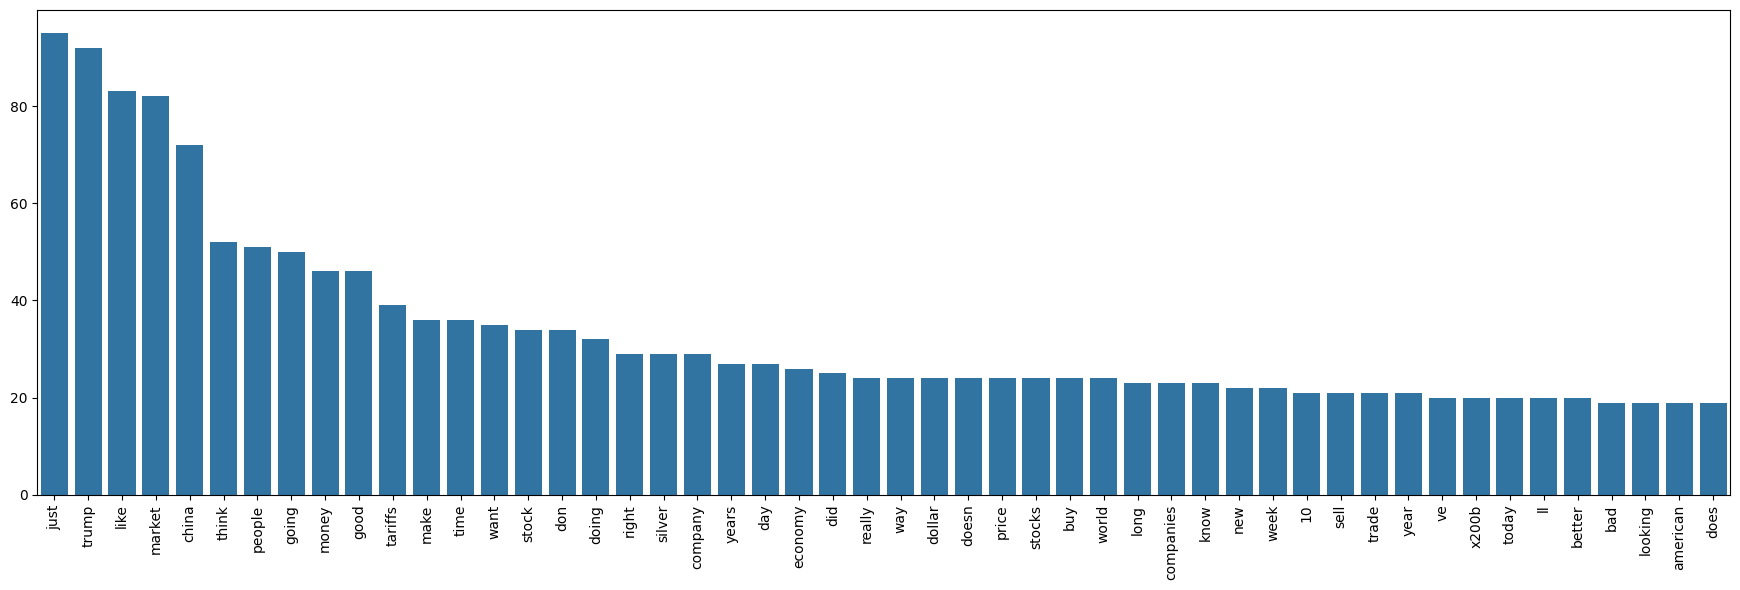

In [101]:


top_n = 50 
idx = np.argsort(term_frequencies)[::-1][:top_n]
terms = np.array(count_vect.get_feature_names_out())[idx]
tfs = term_frequencies[idx]

plt.subplots(figsize=(max(12, top_n*0.35), 6))
g = sns.barplot(x=terms, y=tfs)
g.set_xticklabels(terms, rotation=90)
plt.tight_layout()
plt.show()


### EXERCISE 12

C:\Users\81203\AppData\Local\Temp\ipykernel_54260\1186034735.py:16: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(terms, rotation=90)


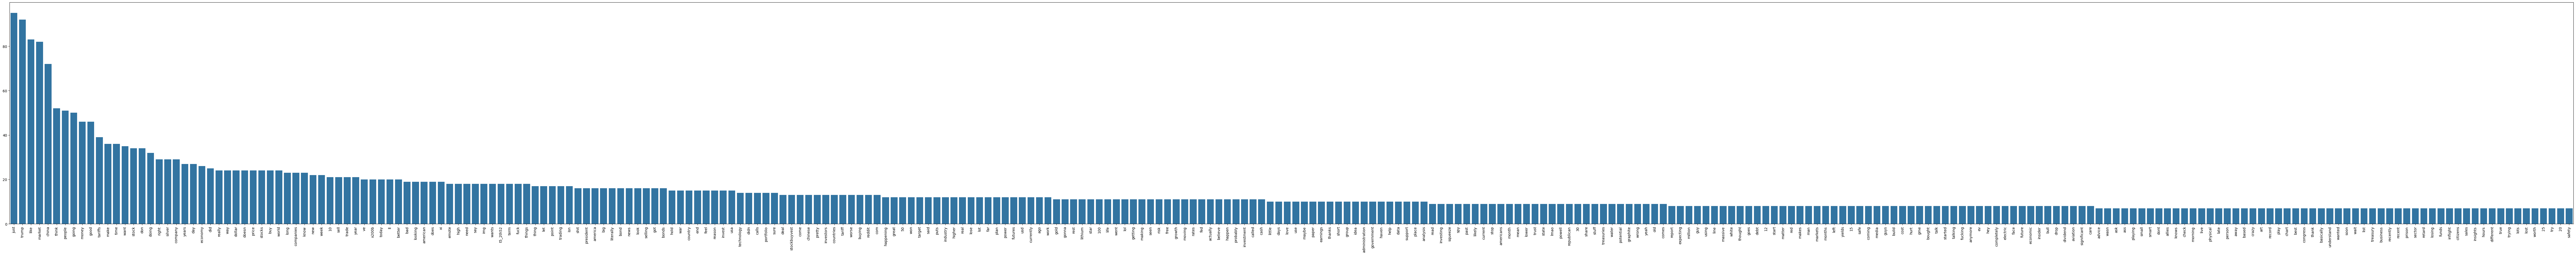

In [ ]:
# Exercise 12（HW）: barplot of term frequencies (first 300 terms)
# 練習 12：畫出前 300 個詞的出現次數長條圖
# Note: this follows Master style 


top_n = 300
idx = np.argsort(term_frequencies)[::-1][:top_n]
terms = np.array(count_vect.get_feature_names_out())[idx]
tfs = term_frequencies[idx]

plt.figure(figsize=(100, 10))  # 跟 Master 類似的超寬圖
ax = sns.barplot(x=terms, y=tfs)
ax.set_xticklabels(terms, rotation=90)
plt.tight_layout()
plt.show()



### Exercise 13

C:\Users\81203\AppData\Local\Temp\ipykernel_54260\2914886641.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(filtered_terms[idx], rotation=90)


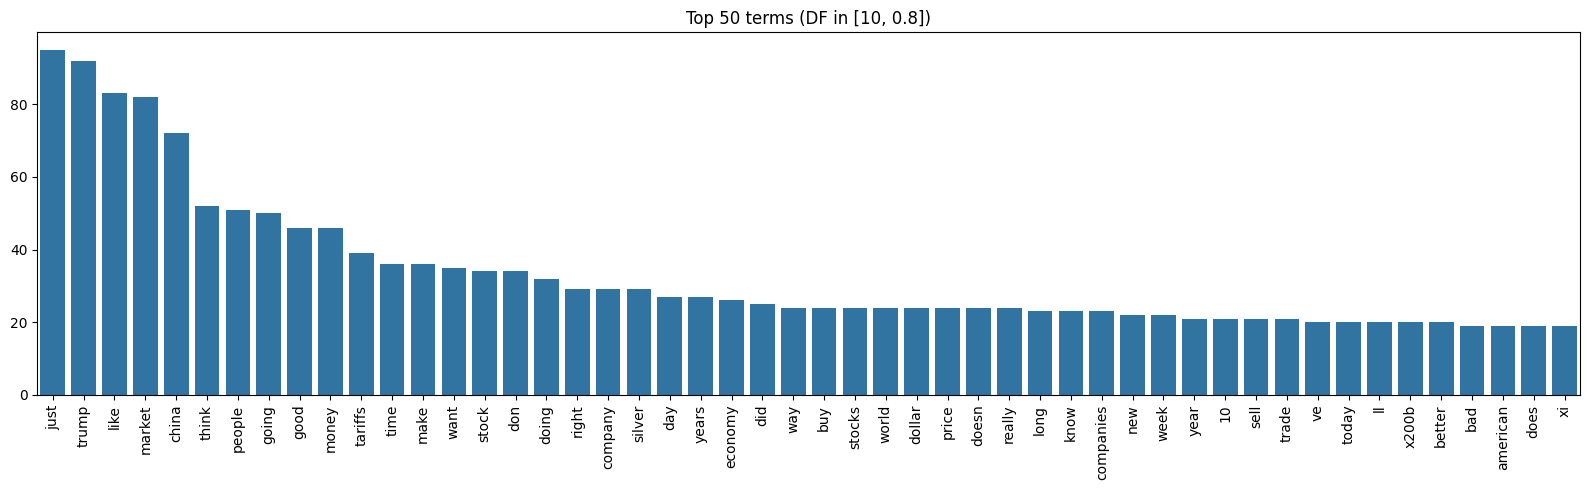

In [106]:
# Efficiently reduce the number of terms to visualize
# 有效率地減少要視覺化的詞數，先做特徵篩選，再畫 Top-N


# 1) 準備詞彙表與 DF（Document Frequency：每個詞出現在幾篇文件）
# 1) Prepare vocabulary and DF (Document Frequency: in how many docs a term appears)
vocab = np.array(count_vect.get_feature_names_out())
dfreq = np.asarray((X_counts > 0).sum(axis=0)).ravel()  # DF per term

# 2) 設定 DF 篩選門檻：移除太稀有/太常見的詞
# 2) Set DF thresholds: remove too-rare / too-common terms
min_df_docs = 10          # 至少出現在 10 篇文件 / appears in at least 10 docs
max_df_ratio = 0.8        # 出現在超過 80% 文件視為太常見 / too common if appears in >80% docs

# 保留符合門檻的詞索引 / keep indices that pass thresholds
keep = np.where(
    (dfreq >= min_df_docs) &
    (dfreq <= max_df_ratio * X_counts.shape[0])
)[0]

# 3) 在篩選後的詞裡，用 TF（Term Frequency：全資料出現總次數）排序取 Top-N
# 3) Among kept terms, rank by TF (total counts) and take Top-N
filtered_tf = term_frequencies[keep]
filtered_terms = vocab[keep]

top_n = 50
idx = np.argsort(filtered_tf)[::-1][:top_n]  # indices within filtered arrays

# 4) 畫圖：只畫篩選後的 Top-N
# 4) Plot: visualize only filtered Top-N for efficiency and readability
plt.figure(figsize=(16, 5))
ax = sns.barplot(x=filtered_terms[idx], y=filtered_tf[idx])
ax.set_xticklabels(filtered_terms[idx], rotation=90)
ax.set_title(f"Top {top_n} terms (DF in [{min_df_docs}, {max_df_ratio:.1f}])")
plt.tight_layout()
plt.show()


### 14 sort by frequency

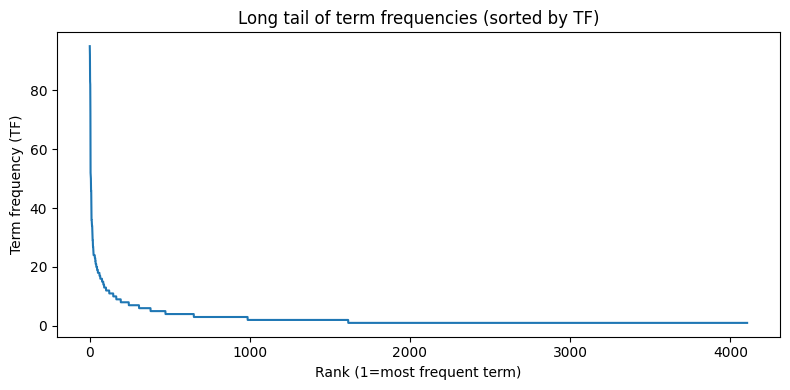

In [108]:
#sort x-axis terms by frequency to observe long tail
import numpy as np
import matplotlib.pyplot as plt

vocab = np.array(count_vect.get_feature_names_out())

# 1) 依 TF 由大到小排序 / sort by term frequency (descending)
idx = np.argsort(term_frequencies)[::-1]
tf_sorted = term_frequencies[idx]
terms_sorted = vocab[idx]

# 2) 畫長尾
# Plot long tail using rank on x-axis (more readable than plotting term strings)
ranks = np.arange(1, len(tf_sorted) + 1)

plt.figure(figsize=(8, 4))
plt.plot(ranks, tf_sorted)
plt.title("Long tail of term frequencies (sorted by TF)")
plt.xlabel("Rank (1=most frequent term)")
plt.ylabel("Term frequency (TF)")
plt.tight_layout()
plt.show()


C:\Users\81203\AppData\Local\Temp\ipykernel_54260\3572571170.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)


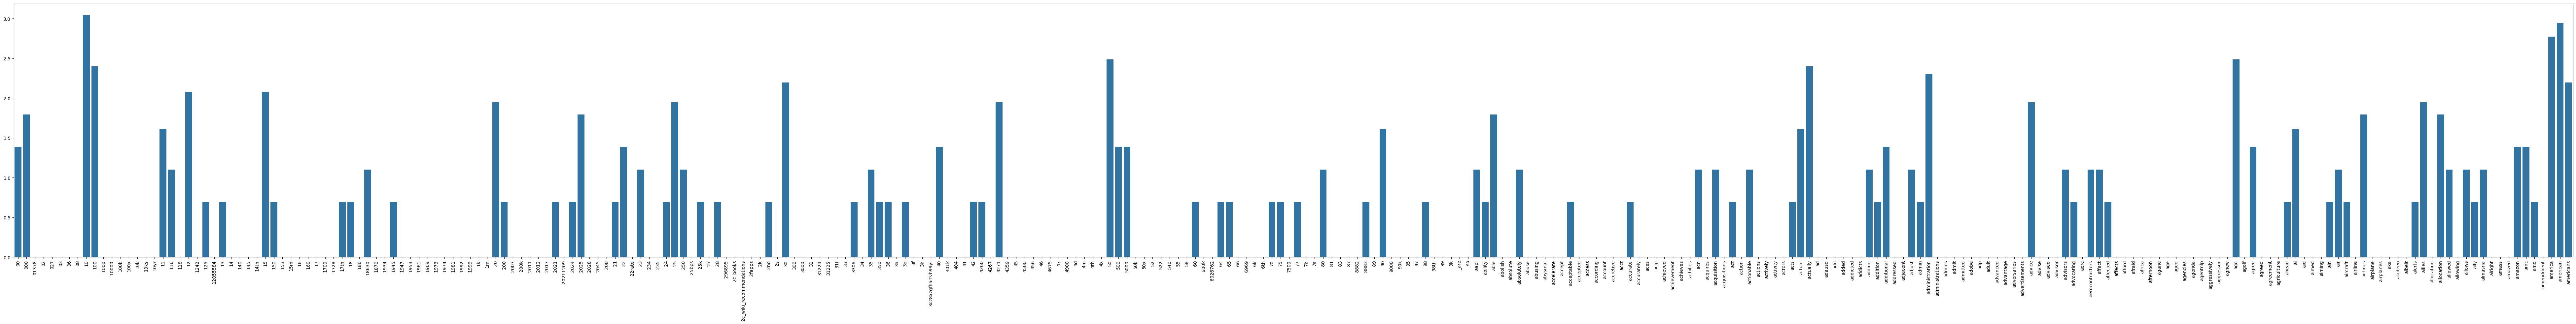

In [ ]:
import math


# 避免 log(0)：把 0 改成 1
# Avoid log(0): replace 0 with 1
tf_safe = np.where(term_frequencies <= 0, 1, term_frequencies)

term_frequencies_log = [math.log(i) for i in tf_safe]

plt.subplots(figsize=(100, 10))
g = sns.barplot(
    x=count_vect.get_feature_names_out()[:300],
    y=term_frequencies_log[:300]
)
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation=90)
plt.show()



### EXERCISE 15

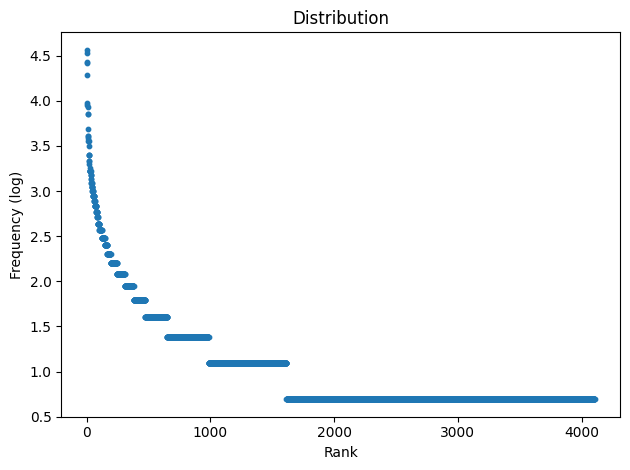

In [114]:
# Answer here


# 把 term_frequencies 改成 term_frequencies_log 就好
tf = np.asarray(term_frequencies_log).ravel()
tf_sorted = np.sort(tf)[::-1]  # 小到大排序後倒轉（由大到小）

# 把順序用 arange 生成等差數列（rank）
ranks = np.arange(1, len(tf_sorted) + 1)

plt.scatter(x=ranks, y=tf_sorted, s=10)  # 畫散佈圖
plt.title("Distribution")
plt.xlabel("Rank")
plt.ylabel("Frequency (log)")
plt.tight_layout()
plt.show()



### COMMENT
發現:
1.log 後更容易看出RANK 0-1000的變化，曲線不像原本一樣很快就降到0附近
1. fter applying the log transformation, it becomes easier to observe changes in the lower-rank region (roughly rank 1–1000). The curve no longer drops to near zero as quickly as in the original term-frequency plot, so differences among medium- and low-frequency terms are more visible.
2.水平的橫槓代表許多詞有相同頻率 / Horizontal steps mean many ties

# Part 2 new visualization

1. 情緒在不同REDDIT子版的比例

可以看出正向情緒整偏少，Stocktodaytoby子版的中立情緒特別多，且費面情緒比例最少

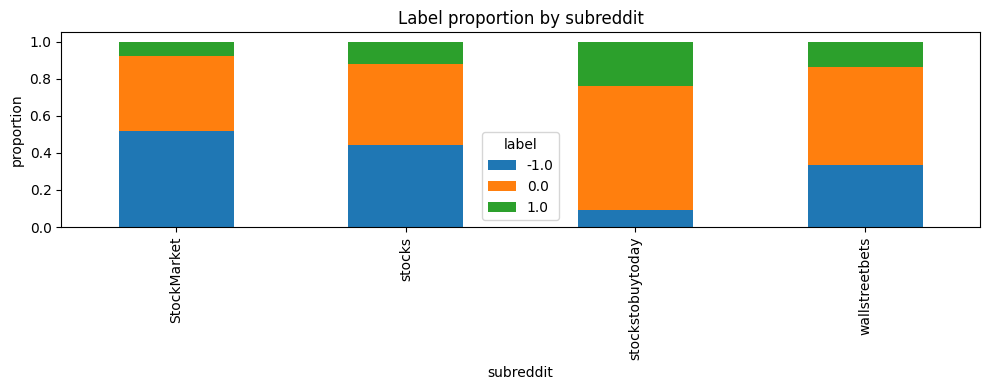

In [119]:

pivot = pd.crosstab(df_work["subreddit"], df_work["label"], normalize="index")
ax = pivot.plot(kind="bar", stacked=True, figsize=(10,4))
ax.set_title("Label proportion by subreddit")
ax.set_xlabel("subreddit")
ax.set_ylabel("proportion")
plt.tight_layout()
plt.show()


 polarity vs subjectivity Scatter plot
 來看情緒極端程度跟主觀程度有沒有關係

INSIGHT:
 這張 polarity vs subjectivity 的散點圖顯示，多數資料點集中在 polarity 接近 0 的區域，代表很多貼文在情緒正負向上被判定為偏中性。另外可以觀察到一個趨勢：當 subjectivity 較低（較客觀）時，polarity 多半聚集在 0 附近；當 subjectivity 較高（較主觀）時，polarity 的分布範圍變大，正負情緒的點都更常出現

The polarity vs subjectivity scatter plot shows that most points cluster around polarity values close to 0, suggesting that many posts are assessed as fairly neutral in terms of sentiment direction. Another clear pattern is that when subjectivity is low (more objective text), polarity tends to stay near 0; when subjectivity is higher (more subjective text), polarity spreads out more widely, and both positive and negative sentiment values appear more often.

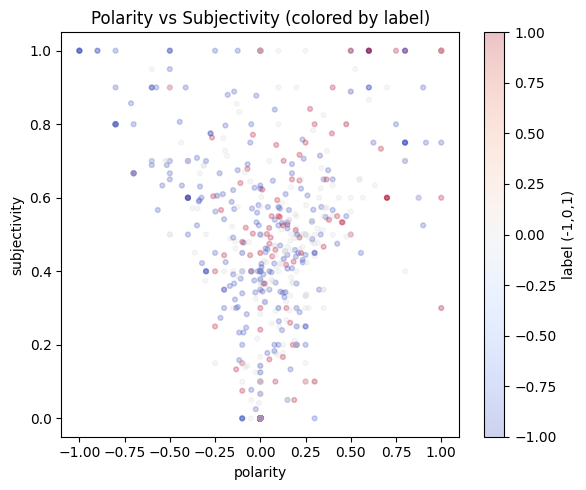

In [120]:

tmp = df_work.dropna(subset=["polarity", "subjectivity"]).copy()
plt.figure(figsize=(6,5))
sc = plt.scatter(tmp["polarity"], tmp["subjectivity"], c=tmp["label"], cmap="coolwarm", alpha=0.25, s=12)
plt.colorbar(sc, label="label (-1,0,1)")
plt.title("Polarity vs Subjectivity (colored by label)")
plt.xlabel("polarity")
plt.ylabel("subjectivity")
plt.tight_layout()
plt.show()


# Phase 2

# Content

Part 2 TF‑IDF & Naive Bayes 

Part 3 Comment the inefficient

### Part 2 TF‑IDF & Naive Bayes 



In [117]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.metrics import classification_report, confusion_matrix

# 1) Prepare X (text) and y (label)
# 1)  X=文字與Y=情緒標籤
X = df_work["text"].fillna("").astype(str)
y = df_work["label"].astype(int)  # -1, 0, 1

# 2) Train/test split
# 2) 切分訓練/測試集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 3) Pipeline
# - Pipeline packages vectorization + classifier into one object
# - Prevents leakage (vocabulary/IDF are learned only from training data)
# - Ensures fair comparison between different feature sets/models
# - Easier to extend to CV and hyperparameter tuning

# - 把「向量化(Vectorizer)」+「模型(Classifier)」串成一個物件，fit/predict 一次就完成整個流程
# - 避免手動寫 fit_transform / transform，降低出錯（尤其避免資料洩漏：test 不應該參與 fit vocab/IDF）
# - 讓兩個模型比較更公平：只換 vectorizer/NB，其餘流程一致
# - 也方便之後做交叉驗證、調參（GridSearchCV）


# (1) Word frequency features (Count/BoW) + Multinomial Naive Bayes

# Why MultinomialNB?
# Classic choice for text classification with non-negative count features
clf_count = Pipeline([
    ("vect", CountVectorizer(stop_words="english")),
    ("nb", MultinomialNB()),
])

# (2) TF-IDF features + Complement Naive Bayes
# Why ComplementNB?
# - Often more robust than MultinomialNB for text, especially with class imbalance
clf_tfidf = Pipeline([
    ("tfidf", TfidfVectorizer(stop_words="english")),
    ("nb", ComplementNB()),
])

# 4) Train, predict, and evaluate 
# same train/test split for fair comparison
for name, model in [("Count+MNB", clf_count), ("TFIDF+CNB", clf_tfidf)]:
    model.fit(X_train, y_train)           # fit vectorizer + NB on training set
    pred = model.predict(X_test)          # predict on test set

    print("\n===", name, "===")
    print(classification_report(y_test, pred, digits=3))
    print("Confusion matrix:\n", confusion_matrix(y_test, pred))



=== Count+MNB ===
              precision    recall  f1-score   support

          -1      0.556     0.714     0.625        63
           0      0.600     0.600     0.600        80
           1      0.500     0.091     0.154        22

    accuracy                          0.576       165
   macro avg      0.552     0.468     0.460       165
weighted avg      0.570     0.576     0.550       165

Confusion matrix:
 [[45 18  0]
 [30 48  2]
 [ 6 14  2]]

=== TFIDF+CNB ===
              precision    recall  f1-score   support

          -1      0.550     0.698     0.615        63
           0      0.606     0.537     0.570        80
           1      0.357     0.227     0.278        22

    accuracy                          0.558       165
   macro avg      0.504     0.488     0.488       165
weighted avg      0.551     0.558     0.548       165

Confusion matrix:
 [[44 17  2]
 [30 43  7]
 [ 6 11  5]]


### RESULT

1. 兩個模型的整體準確率接近，Count+MNB 略高（0.576 vs 0.558）
2. label=1（正向）最難分類：Count+MNB 的 recall 很低（0.091），TFIDF+CNB 的 recall 提升到 0.227，代表 TF‑IDF 有幫助抓到更多正向樣本，但正向仍然是主要弱點
3. label=-1（負向）與 label=0（中立）表現相對穩定，多數錯誤集中在把正向判成中立
4. macro-F1 明顯低於 weighted-F1，原因是正向只有 22 筆因此只看 accuracy 可能會誤判模型能力
5. TFIDF+CNB 雖然提高了正向的召回(正向預測由 2→5），但也增加中立被判成正向的情況，導致整體 accuracy 沒有提升

結論:原本預期TF‑IDF 會比純 count 更能找出重要的詞、ComplementNB 對文字與類別不平衡更穩，因此結果較好，但結果顯示雖然TFIDF+CNB label=1 的 recall 有提升（0.091 → 0.227），但中立誤判成正向的情況也變多了， trade-off之下整體accuracy沒有提升反而更低。

1.The overall accuracies of the two models are close, with Count+MNB slightly higher (0.576 vs 0.558).

2.The positive class (label=1) is the hardest to classify: Count+MNB has very low recall (0.091), while TFIDF+CNB improves recall to 0.227. This indicates TF‑IDF helps capture more positive samples, but the positive class remains the main weakness.

3.The negative (label=-1) and neutral (label=0) classes are relatively stable, and most errors come from predicting positives as neutral.

4.Macro-F1 is noticeably lower than weighted-F1 because there are only 22 positive samples; therefore, relying on accuracy alone can overestimate the model’s performance.

5.Although TFIDF+CNB improves positive recall (correct positive predictions increase from 2 to 5), it also increases cases where neutral samples are predicted as positive, so overall accuracy does not improve.

SUMMARY: We initially expected TF‑IDF to identify more informative terms than raw word counts, and ComplementNB to be more robust for text data and class imbalance, leading to better overall performance. However, the results show that while TFIDF+CNB improves recall for label=1 (0.091 → 0.227), it also increases cases where neutral samples are misclassified as positive. Under this trade-off, the overall accuracy does not improve and is slightly lower instead.

### Part4 Comment the inefficient


文字清理更貼資料：移除 markdown/emote、URL、特殊符號/股票 ticker（$TSLA）等，避免變成無意義 token。
避免資料洩漏：先 drop_duplicates(text) 再 split，避免同內容同時出現在 train/test。
更合理的特徵設定：調 min_df/max_df/max_features/ngram_range，減少稀疏與雜訊。
更好的評估方式：不只看 accuracy，改看 macro‑F1、confusion matrix（因為 3 類且可能不平衡）。
效率與可重現：用 Pipeline、固定 random_state，不要重複 fit/transform。